<a href="https://colab.research.google.com/github/manisha-mishra-123/Scaler-projects/blob/main/Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from google.colab import files
import seaborn as sns
from scipy.stats import f_oneway

In [62]:
yulu_df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')
yulu_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [63]:
yulu_df.shape

(10886, 12)

In [64]:
yulu_df.size

130632

In [65]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [66]:
yulu_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [67]:
yulu_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [68]:
yulu_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [69]:
season_df=yulu_df.groupby('season')['count'].describe().reset_index()
desc={1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
season_df['desc']=season_df['season'].map(desc)
season_df

,season,count,mean,std,min,25%,50%,75%,max,desc
0,1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0,spring
1,2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0,summer
2,3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0,fall
3,4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0,winter


Season 1 has less median while the other seasons have similar median. This shows season 1 has less demand compared to other seasons.

The below visual also reconfirms the above analysis.

<ipython-input-70-40ada35221b7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='count',palette=["red", "green", "blue","yellow"], data=yulu_df)


<Axes: xlabel='season', ylabel='count'>

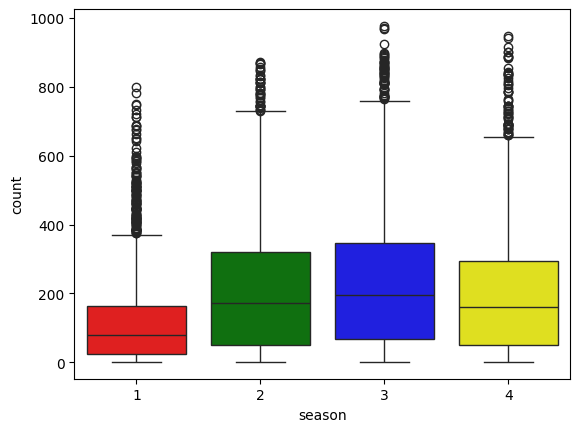

In [70]:
sns.boxplot(x='season', y='count',palette=["red", "green", "blue","yellow"], data=yulu_df)

In [71]:
holiday_df=yulu_df.groupby('holiday')['count'].describe().reset_index()
desc={1:'Yes', 0:'No'}
holiday_df['desc']=holiday_df['holiday'].map(desc)
holiday_df

,holiday,count,mean,std,min,25%,50%,75%,max,desc
0,0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0,No
1,1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0,Yes


From the holiday visual analysis it is hard to comment if holiday has any effect on the number of cycles rented

<ipython-input-72-2b1cbe416932>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='holiday', y='count',palette=["red", "green", "blue","yellow"], data=yulu_df)
<ipython-input-72-2b1cbe416932>:1: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x='holiday', y='count',palette=["red", "green", "blue","yellow"], data=yulu_df)


<Axes: xlabel='holiday', ylabel='count'>

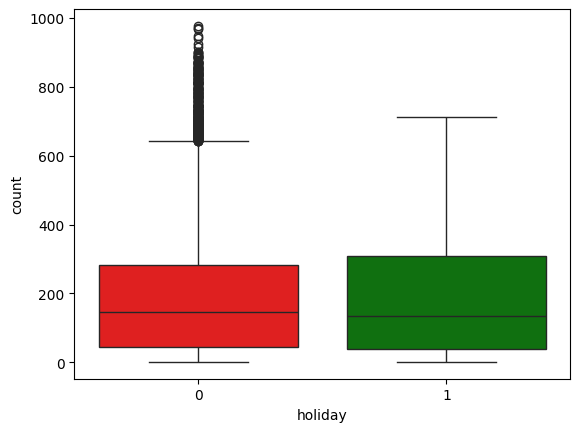

In [72]:
sns.boxplot(x='holiday', y='count',palette=["red", "green", "blue","yellow"], data=yulu_df)

In [73]:
workingday_df=yulu_df.groupby('workingday')['count'].describe().reset_index()
desc={1:'Yes', 0:'No'}
workingday_df['desc']=workingday_df['workingday'].map(desc)
workingday_df

,workingday,count,mean,std,min,25%,50%,75%,max,desc
0,0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0,No
1,1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0,Yes


From the working day analysis it is hard to comment if working day has any effect on the number of cycles rented

<ipython-input-74-620c1595b9b9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='count', palette=["red", "green", "blue","yellow"], data=yulu_df)
<ipython-input-74-620c1595b9b9>:1: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x='workingday', y='count', palette=["red", "green", "blue","yellow"], data=yulu_df)


<Axes: xlabel='workingday', ylabel='count'>

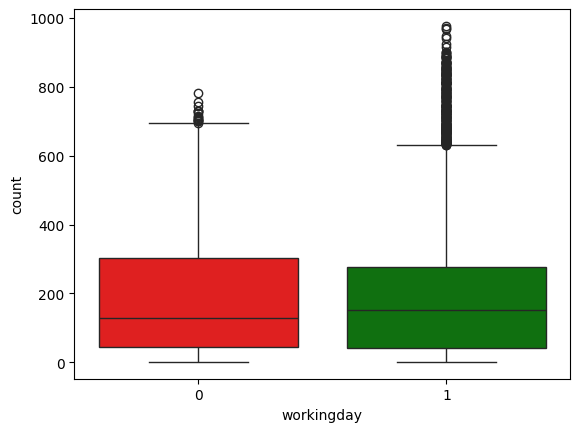

In [74]:
sns.boxplot(x='workingday', y='count', palette=["red", "green", "blue","yellow"], data=yulu_df)

In [75]:
weather_df=yulu_df.groupby('weather')['count'].describe().reset_index()
desc={1: 'Clear, Few clouds, partly cloudy, partly cloudy',
2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}
weather_df['desc']=weather_df['weather'].map(desc)
weather_df

,weather,count,mean,std,min,25%,50%,75%,max,desc
0,1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0,"Clear, Few clouds, partly cloudy, partly cloudy"
1,2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
2,3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0,"Light Snow, Light Rain + Thunderstorm + Scatte..."
3,4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0,Heavy Rain + Ice Pallets + Thunderstorm + Mist...


From the below visual analysis it seems that the 4 weather has no effect on count of cycles rented and 1st and 2nd weather has more number of cycles rented than the 3rd weather.

<ipython-input-76-3fd6084d6bcf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather',y='count', palette=["red", "green", "blue","yellow"], data=yulu_df)


<Axes: xlabel='weather', ylabel='count'>

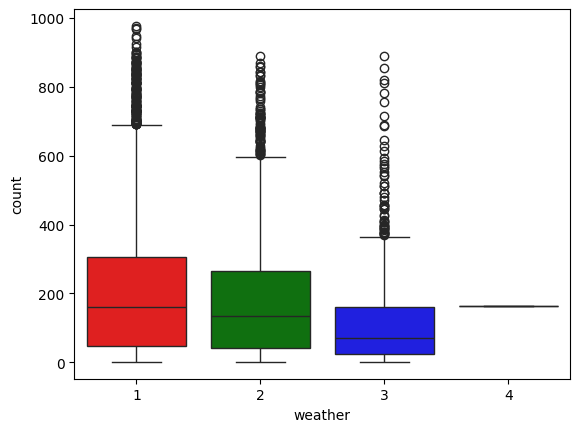

In [76]:
sns.boxplot(x='weather',y='count', palette=["red", "green", "blue","yellow"], data=yulu_df)

Test to determine whether working day has effect on count of cycles rented.
#H0- Working Day number of cycles rented<=Non-working day number of cycles
#Ha- Working Day number of cycles rented>Non-working day number of cycles

In [77]:
workingday_df

,workingday,count,mean,std,min,25%,50%,75%,max,desc
0,0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0,No
1,1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0,Yes


In [78]:
working_df=yulu_df[yulu_df['workingday']==1]['count'].sample(3000)
nonworking_df=yulu_df[yulu_df['workingday']==0]['count'].sample(3000)

In [79]:
#H0- workingday has no effect
#Ha- workingday has effect
alpha=0.05
t_stat, pvalue=ttest_ind(working_df, nonworking_df, equal_var=False, alternative='greater')
print(t_stat, pvalue)
if pvalue<alpha:
  print('Working Day number of cycles rented > Non-working day number of cycles')
else:
  print('Working Day number of cycles rented <= Non-working day number of cycles')

2.0065229780513376 0.02242273815713071
Working Day number of cycles rented > Non-working day number of cycles


Test to determine whether Holiday day has effect on count of cycles rented.

#H0- Holiday Day number of cycles rented<=Non-holiday number of cycles
#Ha- Holiday Day number of cycles rented>Non-holiday number of cycles

In [80]:
holiday_df

,holiday,count,mean,std,min,25%,50%,75%,max,desc
0,0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0,No
1,1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0,Yes


In [81]:
holiday=yulu_df[yulu_df['holiday']==1]['count'].sample(300)
nonholiday=yulu_df[yulu_df['holiday']==0]['count'].sample(300)

In [82]:
#H0- holiday has no effect
#Ha- holiday has effect
alpha=0.05
t_stat, pvalue=ttest_ind(holiday, nonholiday, equal_var=False, alternative="greater")
print(t_stat, pvalue)
if pvalue<alpha:
  print('Holiday Day number of cycles rented>Non-holiday number of cycles')
else:
  print('Holiday Day number of cycles rented<=Non-holiday number of cycles')

0.4324571829518582 0.3327826673383234
Holiday Day number of cycles rented<=Non-holiday number of cycles


Test to determine whether Season has effect on count of cycles rented.

#H0- Season has no effect on the number of cycles
#Ha- Season has effect on the number of cycles rented

In [83]:
season_df

,season,count,mean,std,min,25%,50%,75%,max,desc
0,1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0,spring
1,2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0,summer
2,3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0,fall
3,4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0,winter


In [84]:
s1=yulu_df[yulu_df['season']==1]['count'].sample(2500)
s2=yulu_df[yulu_df['season']==2]['count'].sample(2500)
s3=yulu_df[yulu_df['season']==3]['count'].sample(2500)
s4=yulu_df[yulu_df['season']==4]['count'].sample(2500)

In [85]:
#H0- Season has no effect
#Ha- Season has effect
alpha=0.05
stat, pvalue=f_oneway(s1,s2,s3,s4)
print(stat, pvalue)
if pvalue<alpha:
  print('Season has effect on number of cycles')
else:
  print('Season has no effect on number of cycles')

213.81212446064157 1.963817241029586e-134
Season has effect on number of cycles


Test to determine whether weather has effect on count of cycles rented

#H0- Weather has no effect on the number of cycles
#Ha- Weather has effect on the number of cycles rented

In [86]:
weather_df

,weather,count,mean,std,min,25%,50%,75%,max,desc
0,1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0,"Clear, Few clouds, partly cloudy, partly cloudy"
1,2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
2,3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0,"Light Snow, Light Rain + Thunderstorm + Scatte..."
3,4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0,Heavy Rain + Ice Pallets + Thunderstorm + Mist...


In [87]:
w1=yulu_df[yulu_df['weather']==1]['count'].sample(850)
w2=yulu_df[yulu_df['weather']==2]['count'].sample(850)
w3=yulu_df[yulu_df['weather']==3]['count'].sample(850)

In [88]:
#H0- Weather has no effect
#Ha- Weather has effect
alpha=0.05
stat, pvalue=f_oneway(w1,w2,w3)
print(stat, pvalue)
if pvalue<alpha:
  print('Weather has effect on number of cycles')
else:
  print('Weather has no effect on number of cycles')

68.51665917341147 1.038645568193036e-29
Weather has effect on number of cycles


Test to determine whether weather has effect on seasons.

#H0- Weather and seasons are not dependent
#Ha- Weather and seasons are dependent

In [89]:
from scipy.stats import chi2_contingency
observed=pd.crosstab(yulu_df['season'],yulu_df['weather'])
observed

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


<Axes: xlabel='weather', ylabel='season'>

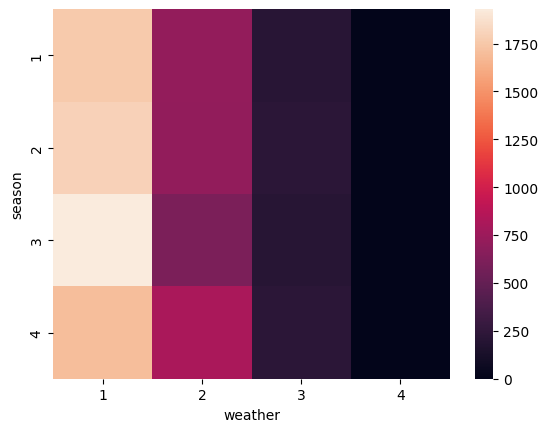

In [90]:
sns.heatmap(observed)

In [91]:
chi2, p, dof, expected=chi2_contingency(observed)
print(chi2, p, dof)
print(expected)
if p>0.05:
  print('Weather and seasons are not dependent')
else:
  print('Weather and seasons are dependent')

49.158655596893624 1.549925073686492e-07 9
[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
Weather and seasons are dependent


To check the normality and equal variance assumptions of the test

For working and nonworking data distribution

stat=0.874, p=0.000
Probably not Normal Distribution


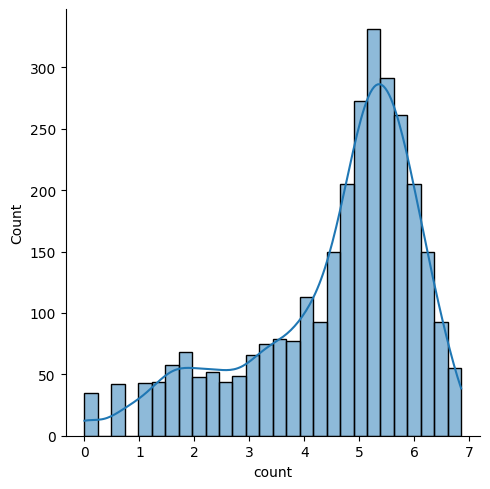

In [92]:
from scipy.stats import shapiro
stat, p = shapiro(working_df)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Normal Distribution')
else:
 print('Probably not Normal Distribution')

sns.displot(np.log(working_df), kde=True)

stat=0.884, p=0.000
Probably not Normal Distribution


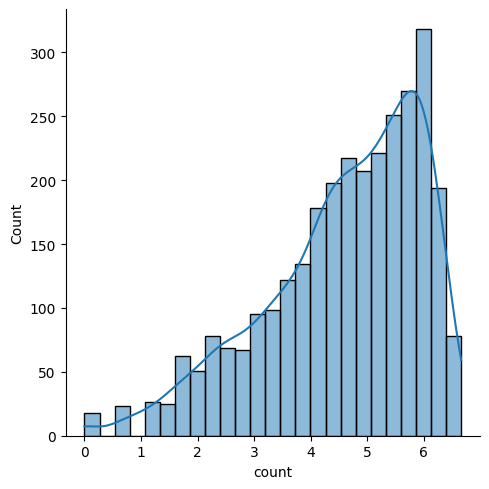

In [93]:
stat, p = shapiro(nonworking_df)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Normal Distribution')
else:
 print('Probably not Normal Distribution')

sns.displot(np.log(nonworking_df), kde=True)

To check if the weather distribution for each weather follows normal distribution

stat=0.889, p=0.000
Probably not Normal Distribution


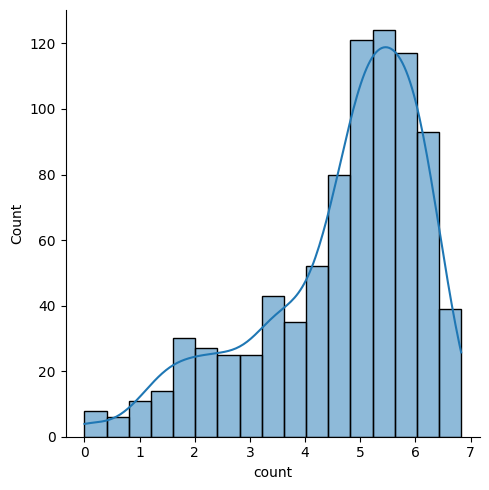

In [94]:
stat, p = shapiro(w1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Normal Distribution')
else:
 print('Probably not Normal Distribution')

sns.displot(np.log(w1), kde=True)

stat=0.893, p=0.000
Probably not Normal Distribution


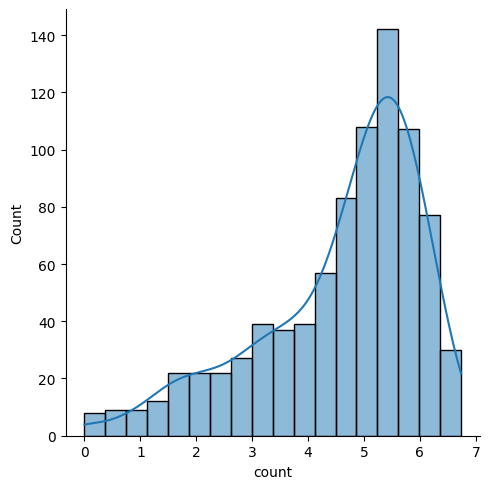

In [95]:
stat, p = shapiro(w2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Normal Distribution')
else:
 print('Probably not Normal Distribution')

sns.displot(np.log(w2), kde=True)

stat=0.766, p=0.000
Probably not Normal Distribution


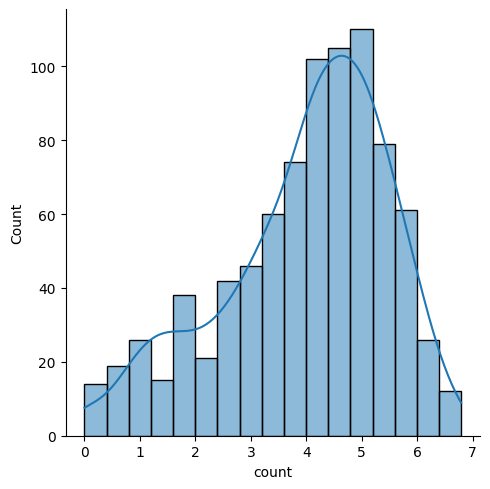

In [96]:
stat, p = shapiro(w3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Normal Distribution')
else:
 print('Probably not Normal Distribution')

sns.displot(np.log(w3), kde=True)

To check if the seasons distribution for each seasons follows normal distribution

stat=0.809, p=0.000
Probably not Normal Distribution


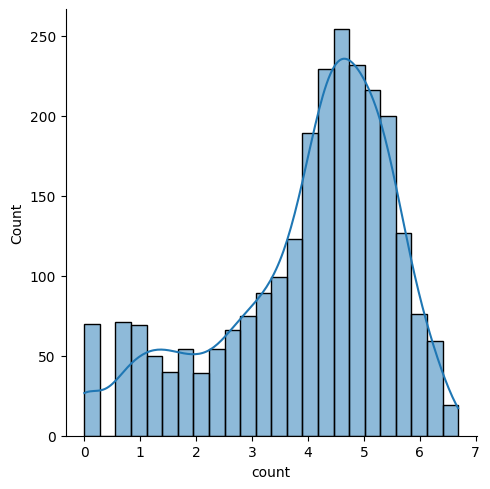

In [97]:
stat, p = shapiro(s1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Normal Distribution')
else:
 print('Probably not Normal Distribution')

sns.displot(np.log(s1), kde=True)

stat=0.901, p=0.000
Probably not Normal Distribution


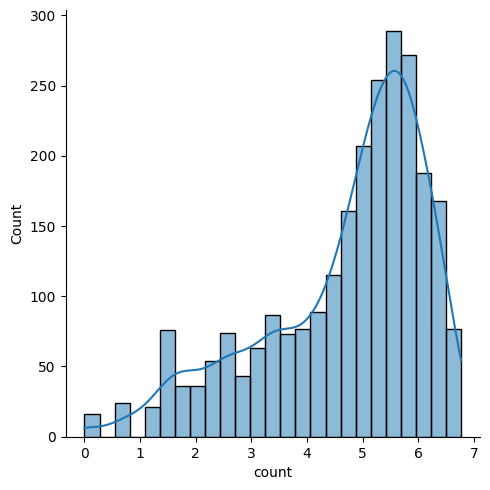

In [98]:
stat, p = shapiro(s2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Normal Distribution')
else:
 print('Probably not Normal Distribution')

sns.displot(np.log(s2), kde=True)

stat=0.915, p=0.000
Probably not Normal Distribution


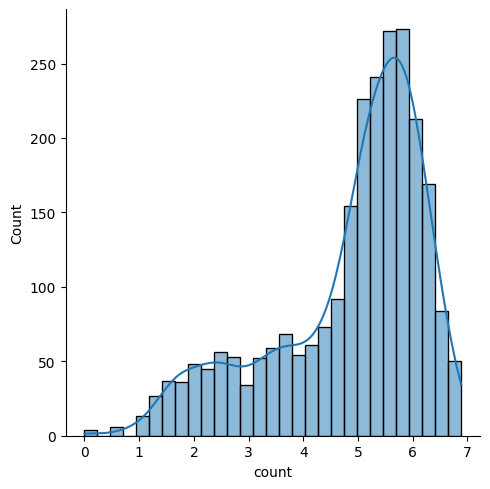

In [99]:
stat, p = shapiro(s3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Normal Distribution')
else:
 print('Probably not Normal Distribution')

sns.displot(np.log(s3), kde=True)

stat=0.897, p=0.000
Probably not Normal Distribution


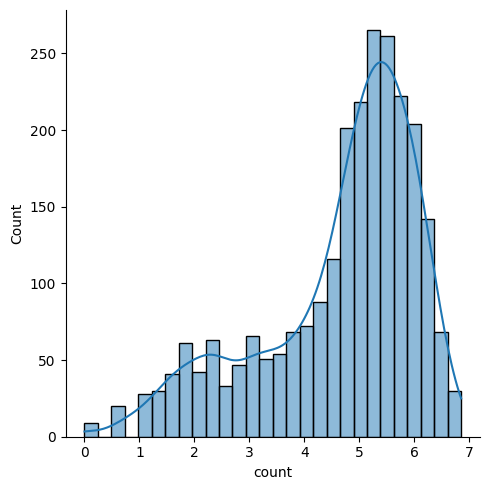

In [100]:
stat, p = shapiro(s4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Normal Distribution')
else:
 print('Probably not Normal Distribution')

sns.displot(np.log(s4), kde=True)